In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "1234",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [6]:
con = PostgresConnection().getConnection()

successfully connected to database


# Q1.1: Find the division wise total_sale_price joining fact table and respective dimension table

In [7]:
con = PostgresConnection().getConnection()
cur = con.cursor()
stmt =  "SELECT sd.division, SUM(ft.total_price) " \
        "FROM ecomdb_star_schema.fact_table ft " \
        "JOIN ecomdb_star_schema.store_dim sd ON ft.store_key = sd.store_key " \
        "GROUP BY CUBE(sd.division) " \
        "ORDER BY sd.division "  
cur.execute(stmt)
records = cur.fetchall()
records

successfully connected to database


[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [8]:
df_q1 = pd.DataFrame(records, columns=['division', 'sales'])
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25
7,None,105401435.75


In [9]:
df_q1 =df_q1.drop(7)

In [10]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [11]:
def changetype(x):
    x['sales']=x['sales'].astype('float64')  

In [12]:
changetype(df_q1)

In [13]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [14]:
df_q1=df_q1.set_index(['division'])
df_q1

,sales
division,
BARISAL,7520343.75
CHITTAGONG,19763595.00
DHAKA,40764619.75
KHULNA,11311610.50
RAJSHAHI,12099196.00
RANGPUR,8429836.50
SYLHET,5512234.25


<Axes: ylabel='sales'>

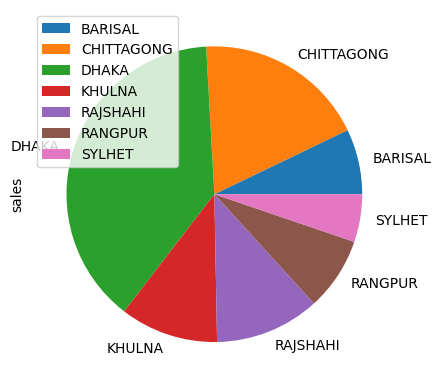

In [15]:
df_q1.plot.pie(y='sales')

In [ ]:
plt.figure(figsize=(10,5))
df_q1.plot.bar(y='sales')

# Q1.2: Find the district wise total_sale_price joining fact table and respective dimension table 

In [25]:
con = PostgresConnection().getConnection()
cur = con.cursor()
stmt =  "SELECT sd.district, SUM(ft.total_price) " \
        "FROM ecomdb_star_schema.fact_table ft " \
        "JOIN ecomdb_star_schema.store_dim sd ON ft.store_key = sd.store_key " \
        "GROUP BY CUBE(sd.district) " \
        "ORDER BY sd.district "  
cur.execute(stmt)
records = cur.fetchall()
records

successfully connected to database


[('BAGERHAT', Decimal('1307651.00')),
 ('BANDARBAN', Decimal('995360.75')),
 ('BARGUNA', Decimal('869041.00')),
 ('BARISAL', Decimal('2897237.75')),
 ('BHOLA', Decimal('1012205.75')),
 ('BOGRA', Decimal('1716452.75')),
 ('BRAHMANBARIA', Decimal('1328234.25')),
 ('CHANDPUR', Decimal('1153276.75')),
 ('CHAPAI NABABGANJ', Decimal('739447.50')),
 ('CHITTAGONG', Decimal('7292985.50')),
 ('CHUADANGA', Decimal('563909.75')),
 ('COMILLA', Decimal('2286898.25')),
 ("COX'S BAZAR", Decimal('1188128.75')),
 ('DHAKA', Decimal('23597621.00')),
 ('DINAJPUR', Decimal('1871005.75')),
 ('FARIDPUR', Decimal('1287383.75')),
 ('FENI', Decimal('847873.50')),
 ('GAIBANDHA', Decimal('997077.75')),
 ('GAZIPUR', Decimal('722286.25')),
 ('GOPALGANJ', Decimal('731312.75')),
 ('HABIGANJ', Decimal('1153998.00')),
 ('JAMALPUR', Decimal('1009760.00')),
 ('JESSORE', Decimal('1132590.50')),
 ('JHALOKATI', Decimal('570807.25')),
 ('JHENAIDAH', Decimal('869991.25')),
 ('JOYPURHAT', Decimal('735378.50')),
 ('KHAGRACHHARI'

# Q1.3: Find the year wise total_sale_price joining fact table and respective dimension table 

In [ ]:
con = PostgresConnection().getConnection()
cur = con.cursor()
stmt =  "SELECT td.year, SUM(ft.total_price) " \
        "FROM ecomdb_star_schema.fact_table ft " \
        "JOIN ecomdb_star_schema.time_dim td on td.time_key = ft.time_key " \
        "GROUP BY CUBE(td.year) " \
        "ORDER BY td.year "
cur.execute(stmt)
records = cur.fetchall()
records

# Q1.4: Find the month wise total_sale_price joining fact table and respective dimension table 

In [ ]:
con = PostgresConnection().getConnection()
cur = con.cursor()
stmt =  "SELECT td.month, SUM(ft.total_price) " \
        "FROM ecomdb_star_schema.fact_table ft " \
        "JOIN ecomdb_star_schema.time_dim td on td.time_key = ft.time_key " \
        "GROUP BY CUBE(td.month) " \
        "ORDER BY td.month "
cur.execute(stmt)
records = cur.fetchall()
records

# Q2.1: Find the customer wise total_sale_price joining fact table and respective dimension table

In [22]:
con = PostgresConnection().getConnection()
cur = con.cursor()
stmt =  "SELECT cd.customer_key, cd.name, SUM(ft.total_price) " \
        "FROM ecomdb_star_schema.fact_table ft " \
        "JOIN ecomdb_star_schema.customer_dim cd on cd.customer_key = ft.customer_key " \
        "GROUP BY CUBE(cd.customer_key, cd.name) " \
        "ORDER BY cd.customer_key "
cur.execute(stmt)
records = cur.fetchall()
records

successfully connected to database


[('C000001', None, Decimal('8344.75')),
 ('C000001', 'sumit', Decimal('8344.75')),
 ('C000002', None, Decimal('11025.50')),
 ('C000002', 'tammanne', Decimal('11025.50')),
 ('C000003', 'kailash kumar', Decimal('12120.25')),
 ('C000003', None, Decimal('12120.25')),
 ('C000004', 'bhagwati prasad', Decimal('13337.00')),
 ('C000004', None, Decimal('13337.00')),
 ('C000005', 'ajay', Decimal('10893.25')),
 ('C000005', None, Decimal('10893.25')),
 ('C000006', 'silender', Decimal('12937.75')),
 ('C000006', None, Decimal('12937.75')),
 ('C000007', 'deepak', Decimal('12935.00')),
 ('C000007', None, Decimal('12935.00')),
 ('C000008', 'akhilesh', Decimal('9714.00')),
 ('C000008', None, Decimal('9714.00')),
 ('C000009', None, Decimal('11760.50')),
 ('C000009', 'dipendra kumar', Decimal('11760.50')),
 ('C000010', 'nitin', Decimal('10208.00')),
 ('C000010', None, Decimal('10208.00')),
 ('C000011', None, Decimal('12475.50')),
 ('C000011', 'doodhnath pandit', Decimal('12475.50')),
 ('C000012', None, Dec

# Q2.2: Find the bank wise total_sale_price joining fact table and respective dimension table

In [23]:
con = PostgresConnection().getConnection()
cur = con.cursor()
stmt =  "SELECT td.bank_name, SUM(ft.total_price) " \
        "FROM ecomdb_star_schema.fact_table ft " \
        "JOIN ecomdb_star_schema.trans_dim td on td.payment_key = ft.payment_key " \
        "GROUP BY CUBE(td.bank_name) " \
        "ORDER BY td.bank_name "
cur.execute(stmt)
records = cur.fetchall()
records

successfully connected to database


[('AB Bank Limited', Decimal('2728515.50')),
 ('Bangladesh Commerce Bank Limited', Decimal('2730999.25')),
 ('Bank Asia Limited', Decimal('2687142.75')),
 ('Bengal Commercial Bank Ltd', Decimal('2704554.25')),
 ('Bkash', Decimal('2689352.50')),
 ('BRAC Bank Limited', Decimal('2705795.75')),
 ('Citizens Bank Limited', Decimal('2723215.25')),
 ('City Bank Limited', Decimal('2713952.50')),
 ('Community Bank Bangladesh Limited', Decimal('2685751.50')),
 ('Dhaka Bank Limited', Decimal('2728366.00')),
 ('Dutch-Bangla Bank Limited', Decimal('2692435.25')),
 ('Eastern Bank Limited', Decimal('2687182.25')),
 ('IFIC Bank Limited', Decimal('2699759.75')),
 ('Jamuna Bank Limited', Decimal('2689886.50')),
 ('Meghna Bank Limited', Decimal('2700528.50')),
 ('Mercantile Bank Limited', Decimal('2676578.50')),
 ('Midland Bank Limited', Decimal('2688430.25')),
 ('Modhumoti Bank Limited', Decimal('2715279.00')),
 ('Mutual Trust Bank Limited', Decimal('2670030.50')),
 ('Nagad', Decimal('2699554.50')),
 ('N

# Q2.3: Find the transaction(cash/online) wise total_sale_price joining fact table and respective dimension table

In [24]:
con = PostgresConnection().getConnection()
cur = con.cursor()
stmt =  "SELECT td.trans_type, SUM(ft.total_price) " \
        "FROM ecomdb_star_schema.fact_table ft " \
        "JOIN ecomdb_star_schema.trans_dim td on td.payment_key = ft.payment_key " \
        "GROUP BY CUBE(td.trans_type) " \
        "ORDER BY td.trans_type "
cur.execute(stmt)
records = cur.fetchall()
records

successfully connected to database


[('card', Decimal('94583038.50')),
 ('cash', Decimal('2708515.75')),
 ('mobile', Decimal('8109881.50')),
 (None, Decimal('105401435.75'))]

# Q3: Total sales in Barisal

In [28]:
con = PostgresConnection().getConnection()
cur = con.cursor()
stmt =  "SELECT sd.division, sum(ft.total_price) " \
        "FROM ecomdb_star_schema.fact_table ft "\
        "JOIN ecomdb_star_schema.store_dim sd ON ft.store_key = sd.store_key "\
        "WHERE division = 'BARISAL' "\
        "GROUP BY CUBE(sd.division) "
cur.execute(stmt)
records = cur.fetchall()
records

successfully connected to database


[('BARISAL', Decimal('7520343.75')), (None, Decimal('7520343.75'))]

# Q4: Total sales in 2015

In [32]:
con = PostgresConnection().getConnection()
cur = con.cursor()
stmt =  "SELECT td.year, SUM(ft.total_price) " \
        "FROM ecomdb_star_schema.fact_table ft " \
        "JOIN ecomdb_star_schema.time_dim td on td.time_key = ft.time_key " \
        "WHERE td.year = 2015 " \
        "GROUP BY CUBE(td.year) " 
cur.execute(stmt)
records = cur.fetchall()
records

successfully connected to database


[(2015, Decimal('15095720.25')), (None, Decimal('15095720.25'))]

# Q5: Total sales of Barisal in 2015

In [33]:
con = PostgresConnection().getConnection()
cur = con.cursor()
stmt =  "select sd.division, td.year, sum(ft.total_price) " \
        "from ecomdb_star_schema.fact_table ft " \
        "join ecomdb_star_schema.store_dim sd on sd.store_key = ft.store_key " \
        "join ecomdb_star_schema.time_dim td on td.time_key = ft.time_key " \
        "where sd.division = 'BARISAL' and td.year = 2015 " \
        "group by CUBE(sd.division, td.year) "
cur.execute(stmt)
records = cur.fetchall()
records

successfully connected to database


[('BARISAL', 2015, Decimal('1076902.75')),
 ('BARISAL', None, Decimal('1076902.75')),
 (None, None, Decimal('1076902.75')),
 (None, 2015, Decimal('1076902.75'))]